# IDs:
ID #1:

ID #2:

ID #3: 806761 (get the permission of joining existed pair from Ben)

# Preprocess

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading file
df = pd.read_csv("AMI_GSE66360_series_matrix.csv", skiprows = np.arange(59), low_memory=False).T

#reset columns' name
df.columns = df.iloc[0]
df.drop(index=["Class"], inplace = True)

#reset index
df.reset_index(drop = False, inplace = True)
df.set_index("ID_REF", inplace = True)
df["index"] = df["index"].apply(lambda x: x[0])
df

Class,index,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,H,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
GSM1620820,H,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
GSM1620821,H,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
GSM1620822,H,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
GSM1620823,H,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,M,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
GSM1620914,M,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
GSM1620915,M,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308


---
# Analysis
## a. High level description of the data and some pre-processing
### 1) How many genes profiled?
54675
### 2) How many samples (subjects/patients) in total?
99

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, GSM1620819 to GSM1620917
Columns: 54676 entries, index to AFFX-TrpnX-M_at
dtypes: object(54676)
memory usage: 41.3+ MB


### 3) How many samples in each class?

In [85]:
df["index"].value_counts()

H    50
M    49
Name: index, dtype: int64

### 4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?
54628 genes left

In [3]:
data = df.dropna(axis=1).T
data.reset_index(drop = False, inplace = True)
data.rename(columns={"ID_REF": "index", "Class": "Gene_ID",}, inplace = True)
data

ID_REF,Gene_ID,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,index,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
4,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54624,AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
54625,AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
54626,AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
54627,AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


### 5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [6]:
#pick 20 genes randomly
np.random.seed(10)
box_index = np.random.randint(1,54628,size=20)

#add classes M and H
box_index = np.append([0],box_index)

#rearrange dataframe
box = data.iloc[box_index].T
box.columns = box.iloc[0]
box.drop(index=["Gene_ID"], inplace = True)
box = pd.melt(box, id_vars=["index"], value_vars=np.array(box.columns[1:]), var_name="gene_id", value_name="value")
box["value"] = box["value"].astype('float64')
box

,index,gene_id,value
0,H,208277_at,4.865434
1,H,208277_at,5.278509
2,H,208277_at,5.167403
3,H,208277_at,5.116704
4,H,208277_at,5.308115
...,...,...,...
1975,M,238273_at,6.554001
1976,M,238273_at,5.763364
1977,M,238273_at,8.172389
1978,M,238273_at,6.711417


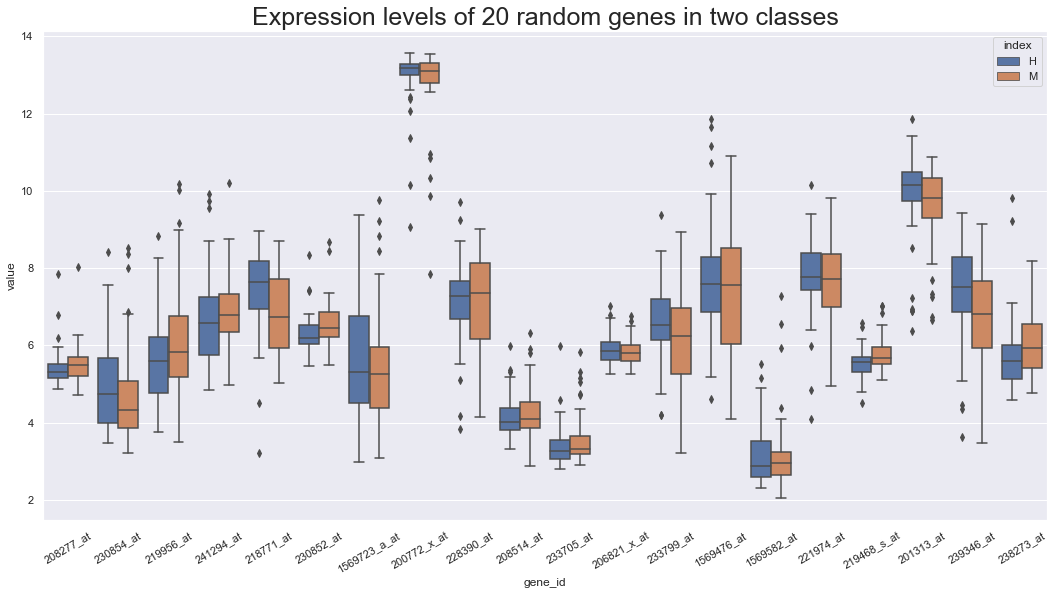

In [5]:
#box plot
plt.figure(figsize = (18, 9))
ax = sns.boxplot(data=box, x="gene_id", y="value", hue="index")
plt.title("Expression levels of 20 random genes in two classes", fontdict={"fontsize": 25})
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

---
## b. WRS for differential expression (DE)
### 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?
Under the null model, there is no difference between H and M, which means the probability of M or H in each spot is 50%. To calculate the sum of ranks of M, we just need to pick 49 numbers from uniform distribution between 1 to 99 and sum them up.

$$E(sum  of  rank)=E(rank_{M_1}+rank_{M_2}+rank_{M_3}+...+rank_{M_{49}})$$  
$$=E(rank_{M_1})+E(rank_{M_2})+E(rank_{M_3})+...+E(rank_{M_{49}})$$  
$$=49\times E(rank_{M})$$  
$$=49\times \sum_{1}^{99}rank_{M}\times p(rank_{M})$$  
$$=49\times \sum_{1}^{99}rank_{M}\times \frac{1}{99}$$  
$$=\frac{49}{99}\times \sum_{1}^{99}rank_{M}$$  
$$=\frac{49}{99}\times \frac{(1+99)\times 99}{2}$$  
$$=2450$$  

In [279]:
S = []
for i in range(100000):
    S.append(np.random.uniform(1,99,size=49).sum())
np.array(S).mean()

2450.8774528169392

### 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?
RS(g) is the sum of rank of all genes labeled M. The maximal value will be got when the rank of all genes labeled M are greater than H.
$$c = max(RS(g))=\sum_{51}^{99}rank_{M}=\frac{(51+99)\times 49}{2}=3675$$
### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)
We define the event A as when $p(RS(g)=c)$, which means all rank of genes labeled as M are higher than H.  
99 different genes, permutations without repetition.
$$\Omega = 99!$$  
Genes labeled H are at rank from 1-50, genes labeled M are at rank from 51-99,they are both permutations without repetition. 
$$A = 50! \times 49!$$  
$$p(RS(g)=c)=P(A)=\frac {A}{\Omega}=\frac {50! \times 49!}{99!}$$

In [8]:
math.factorial(50)*math.factorial(49)/math.factorial(99)

1.9823306042836678e-29

### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

We define the event B as when $p(RS(g)=c-1)$.  
99 different genes, permutations without repetition. $\Omega = 99!$  
Genes labeled H are at rank from 1-49 and 51. We choose one gene from 50 to put it on rank 51, the rest are permutations without repetition.  
Genes labeled M are at rank from 50, 52-99. We choose one gene from 49 to put it on rank 50, the rest are permutations without repetition.  
$$B = 50\times 49! \times 49 \times 48!=50! \times 49!$$  
$$p(RS(g)=c-1)=P(B)=\frac {B}{\Omega}=\frac {50\times 49! \times 49 \times 48!}{99!}$$

In [9]:
50*49*math.factorial(49)*math.factorial(48)/math.factorial(99)

1.9823306042836678e-29

We define the event C as when $p(RS(g)=c-2)$.  
99 different genes, permutations without repetition. $\Omega = 99!$   
Genes labeled H are at rank from 1-49 and 52.   
Genes labeled M are at rank from 50, 51, 53-99.  
$$C_1 = 50\times 49! \times 49 \times 48!=50! \times 49!$$  
Genes labeled H are at rank from 1-48,50 and 51.  
Genes labeled M are at rank from 49, 52-99.  
$$C_2 = 50\times 49! \times 49 \times 48!=50! \times 49!$$  
$$p(RS(g)=c-2)=P(C)=\frac {C_1+C_2}{\Omega}=\frac {2 \times 50! \times 49!}{99!}$$

In [11]:
2*math.factorial(50)*math.factorial(49)/math.factorial(99)

3.9646612085673355e-29

### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [7]:
data

ID_REF,Gene_ID,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,index,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
4,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54624,AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
54625,AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
54626,AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
54627,AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [27]:
#rank all genes
rank = data.iloc[1:,1:]
rank.rank(axis=1)
rank_S = pd.concat([pd.DataFrame(data.iloc[0][1:]).T,rank.rank(axis=1)]).T

#filter genes labeled as M
RS = rank_S.loc[rank_S.loc[:,0] == 'M']
del RS[0]

#sum rank
RS.loc["RS"] = RS.sum(axis=0)
RS

C:\Anaconda\3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,1,2,3,4,5,6,7,8,9,10,...,54619,54620,54621,54622,54623,54624,54625,54626,54627,54628
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620832,46,66,62,12,47,40,24,12,72,56,...,20,18,8,10,77,76,74,34,44,68
GSM1620833,59,16,56,67,78,39,84,16,16,66,...,32,37,24,23,59,14,52,14,13,19
GSM1620834,1,75,42,40,79,56,13,42,55,2,...,27,36,23,24,61,64,55,17,60,54
GSM1620835,28,56,74,45,7,58,51,33,9,9,...,10,28,16,14.5,27,69,21,22,12,17
GSM1620836,36,76,86,33,10,83,34,7,30,68,...,1,12,3,8,64,22,36,12,54,30
GSM1620837,29,96,97,46,18,71,30,26,78,30,...,3,17,19,16,35,62,29,26,33,44
GSM1620838,45,82,81,24,8,79,54,29,15,92,...,14,19,12.5,4,10,72,6,15,31,83
GSM1620839,9,68,44,26,38,59,40,44,89,49,...,18,24,12.5,5,33,7,3,41,25,63
GSM1620840,22,84,72,54,31,90,86,6,35,87,...,22,29,6.5,9,1,10,4,10,1,6


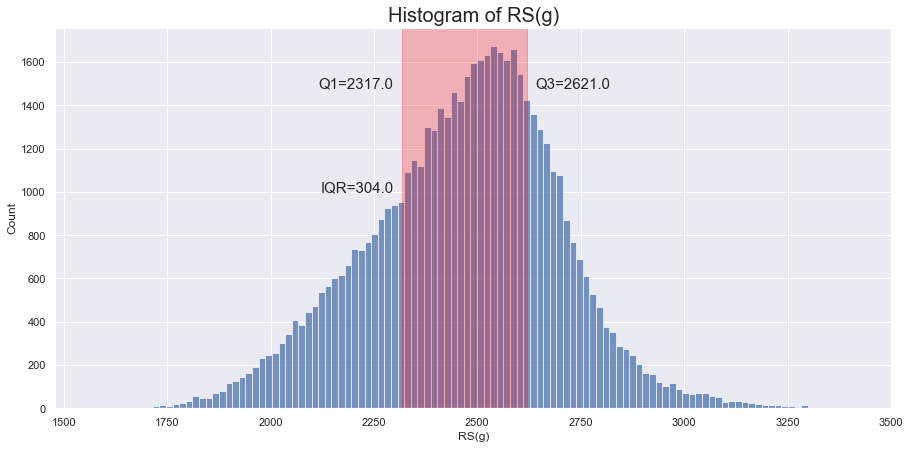

In [34]:
#plot histogram
fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(RS.loc["RS"]).set(xlabel='RS(g)')
ax.set_title("Histogram of RS(g)", fontdict={'size':20})

#add IQR to histogram plot
q1, q3 = np.percentile(RS.loc["RS"], [25, 75])
ax.axvspan(q1, q3, alpha=0.25, color="red")
#ax.vlines(q3, alpha=0.8, ymin=0, ymax=10000, color="red")

#Annotations
ax.text(q1-20, 1500, f'Q1={q1}', horizontalalignment='right', verticalalignment='center', fontdict={'size':15})
ax.text(q3+20, 1500, f'Q3={q3}', horizontalalignment='left', verticalalignment='center', fontdict={'size':15})
ax.text(q1-20, 1000, f'IQR={q3-q1}', horizontalalignment='right', fontdict={'size':15})
plt.show()

---
## c. Differential Expression
### The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. <br>Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.<br> Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07.<br>For both directions use both a Student t-test and a WRS test.

In [75]:
#split M and H
c = data.T
c.columns = c.iloc[0]
c.drop(index=["Gene_ID"], inplace = True)

Hgene = c.loc[c["index"] == "H"]
Mgene = c.loc[c["index"] == "M"]
Hgene = Hgene.drop(labels="index", axis=1)
Mgene = Mgene.drop(labels="index", axis=1)

#change data type from object to float
Hgene = Hgene.astype('float64')
Mgene = Mgene.astype('float64')

In [124]:
from scipy.stats import ranksums
from scipy.stats import ttest_ind

#implement wrs and t-test
WRS_p_value=[]
t_p_value=[]
for i in range (54628):
    WRS_p_value.append(ranksums(x = Hgene.iloc[:,i], y = Mgene.iloc[:,i], alternative='greater')[1])
    t_p_value.append(ttest_ind(a = Hgene.iloc[:,i], b = Mgene.iloc[:,i], equal_var=False, alternative='greater')[1])

In [146]:
WRS_p = pd.DataFrame(WRS_p_value, index = Hgene.columns, columns = ["p_value"])
t_p = pd.DataFrame(t_p_value, index = Hgene.columns, columns = ["p_value"])

In [147]:
print(f"The number of genes overexpressed under WRS at p_value better than 0.07 is {WRS_p[WRS_p <= 0.07].count()[0]}")
print(f"The number of genes underexpressed under WRS at p_value better than 0.07 is {WRS_p[WRS_p >= 0.93].count()[0]}")
print(f"The number of genes overexpressed under t-test at p_value better than 0.07 is {t_p[t_p <= 0.07].count()[0]}")
print(f"The number of genes underexpressed under t-test at p_value better than 0.07 is {t_p[t_p >= 0.93].count()[0]}")

The number of genes overexpressed under WRS at p_value better than 0.07 is 10667
The number of genes underexpressed under WRS at p_value better than 0.07 is 10787
The number of genes overexpressed under t-test at p_value better than 0.07 is 8634
The number of genes underexpressed under t-test at p_value better than 0.07 is 8489


---
## d.Correlations
### Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. <br>Generate a set of 160 genes, D, which is the union of the above two sets.

In [173]:
#top 80 most significant overexpressed genes with smaller p_value in M > H
WRS_p.nsmallest(80, "p_value")

#top 80 most significant underexpressed genes with smaller p_value in M < H
#top 80 most significant underexpressed genes with larger p_value in M > H
WRS_p.nlargest(80, "p_value")

#generate index of D - set of 160 genes
D_index = pd.concat([WRS_p.nsmallest(80, "p_value"), WRS_p.nlargest(80, "p_value")]).index
D_index

Index(['226423_at', '234095_at', '206978_at', '243458_at', '218805_at',
       '220144_s_at', '64064_at', '206991_s_at', '225886_at', '232974_at',
       ...
       '209774_x_at', '232213_at', '204351_at', '235568_at', '200648_s_at',
       '228648_at', '243395_at', '211628_x_at', '203936_s_at', '218319_at'],
      dtype='object', name='Gene_ID', length=160)